In [2]:
import pandas as pa
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as ppt
import seaborn as sbn

%matplotlib inline

In [4]:
data = pa.read_csv('Data/data.csv')

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [7]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [8]:
data

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.010200,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.199000,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.034400,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.604000,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.180000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,5,0.004790,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,6,0.014500,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,7,0.020200,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,8,0.048100,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,9,0.002080,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [11]:
train, test = train_test_split(data, test_size= .15)

In [17]:
print(len(train),len(test))

1714 303


In [35]:
#custom color palette
red_blue = ['#4286f4','#e20f28']
palette = sbn.color_palette(red_blue)
sbn.set_palette(palette)
sbn.set_style('white')

In [36]:
pos_tempo = data[data['target']== 1]['tempo']
neg_tempo = data[data['target']== 0]['tempo']
pos_dance = data[data['target']== 1]['danceability']
neg_dance = data[data['target']== 0]['danceability']
pos_duration = data[data['target']== 1]['duration_ms']
neg_duration = data[data['target']== 0]['duration_ms']
pos_loudness = data[data['target']== 1]['loudness']
neg_loudness = data[data['target']== 0]['loudness']
pos_speechiness = data[data['target']== 1]['speechiness']
neg_speechiness = data[data['target']== 0]['speechiness']
pos_valence = data[data['target']== 1]['valence']
neg_valence = data[data['target']== 0]['valence']
pos_energy = data[data['target']== 1]['energy']
neg_energy = data[data['target']== 0]['energy']
pos_accoustic = data[data['target']== 1]['acousticness']
neg_accoustic = data[data['target']== 0]['acousticness']
pos_key = data[data['target']== 1]['key']
neg_key = data[data['target']== 0]['key']
pos_instrumentalness = data[data['target']== 1]['instrumentalness']
neg_instrumentalness = data[data['target']== 0]['instrumentalness']


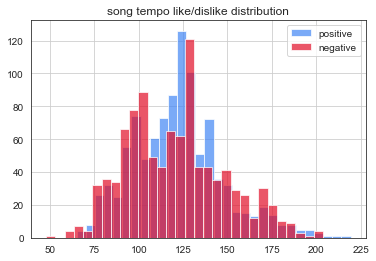

In [37]:
ppt.title("song tempo like/dislike distribution")

pos_tempo.hist(alpha = 0.7, bins =30, label ='positive')

neg_tempo.hist(alpha = 0.7, bins =30, label ='negative')
ppt.legend(loc= 'upper right')

/Users/nimitha/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/nimitha/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/nimitha/anaconda3/lib/python3.7/site-packages/matpl

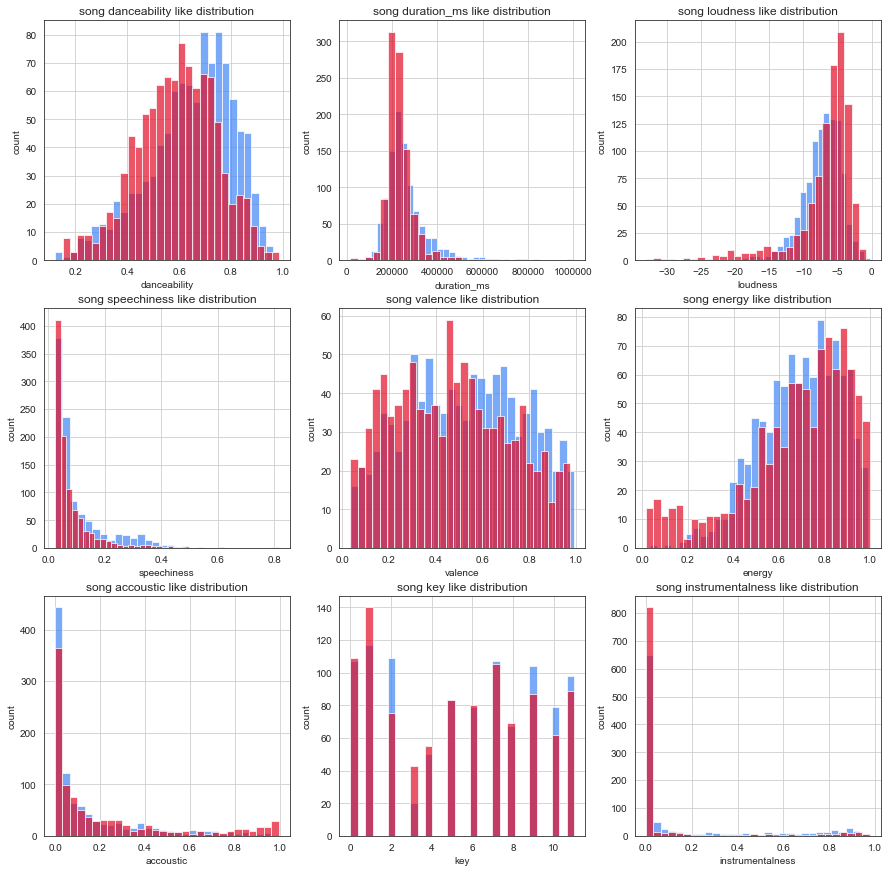

In [38]:
fig2 = ppt.figure( figsize =( 15,15))
#danceability
ax3 = fig2.add_subplot (331)
ax3.set_xlabel('danceability')
ax3.set_ylabel('count')
ax3.set_title('song danceability like distribution')
pos_dance.hist( alpha = 0.7 , bins = 30)
ax4 = fig2.add_subplot (331)
neg_dance.hist( alpha = 0.7 , bins = 30)

ax5 = fig2.add_subplot (332)
ax5.set_xlabel('duration_ms')
ax5.set_ylabel('count')
ax5.set_title('song duration_ms like distribution')
pos_duration.hist( alpha = 0.7 , bins = 30)
ax6 = fig2.add_subplot (332)
neg_duration.hist( alpha = 0.7 , bins = 30)

ax7 = fig2.add_subplot (333)
ax7.set_xlabel('loudness')
ax7.set_ylabel('count')
ax7.set_title('song loudness like distribution')
pos_loudness.hist( alpha = 0.7 , bins = 30)
ax8 = fig2.add_subplot (333)
neg_loudness.hist( alpha = 0.7 , bins = 30)

ax9 = fig2.add_subplot (334)
ax9.set_xlabel('speechiness')
ax9.set_ylabel('count')
ax9.set_title('song speechiness like distribution')
pos_speechiness.hist( alpha = 0.7 , bins = 30)
ax10 = fig2.add_subplot (334)
neg_speechiness.hist( alpha = 0.7 , bins = 30)

ax11 = fig2.add_subplot (335)
ax11.set_xlabel('valence')
ax11.set_ylabel('count')
ax11.set_title('song valence like distribution')
pos_valence.hist( alpha = 0.7 , bins = 30)
ax12 = fig2.add_subplot (335)
neg_valence.hist( alpha = 0.7 , bins = 30)

ax13 = fig2.add_subplot (336)
ax13.set_xlabel('energy')
ax13.set_ylabel('count')
ax13.set_title('song energy like distribution')
pos_energy.hist( alpha = 0.7 , bins = 30)
ax14 = fig2.add_subplot (336)
neg_energy.hist( alpha = 0.7 , bins = 30)

ax15 = fig2.add_subplot (337)
ax15.set_xlabel('accoustic')
ax15.set_ylabel('count')
ax15.set_title('song accoustic like distribution')
pos_accoustic.hist( alpha = 0.7 , bins = 30)
ax16 = fig2.add_subplot (337)
neg_accoustic.hist( alpha = 0.7 , bins = 30)

ax17 = fig2.add_subplot (338)
ax17.set_xlabel('key')
ax17.set_ylabel('count')
ax17.set_title('song key like distribution')
pos_key.hist( alpha = 0.7 , bins = 30)
ax18 = fig2.add_subplot (338)
neg_key.hist( alpha = 0.7 , bins = 30)

ax19 = fig2.add_subplot (339)
ax19.set_xlabel('instrumentalness')
ax19.set_ylabel('count')
ax19.set_title('song instrumentalness like distribution')
pos_instrumentalness.hist( alpha = 0.7 , bins = 30)
ax20 = fig2.add_subplot (339)
neg_instrumentalness.hist( alpha = 0.7 , bins = 30)